In [ ]:
# Author: Gregory Renteria
# Course: MSCS-634 Advanced Big Data and Data Mining
# Lab 1: Data Visualization, Data Processing, and Statistical Analysis Using Python in Jupyter Notebook

            date  precipitation  temp_max  temp_min  wind weather
969   2014-08-27            0.0      28.9      16.1   1.6     sun
1373  2015-10-05            0.0      23.3       9.4   1.6     sun
990   2014-09-17            0.5      22.8      14.4   2.3    rain
433   2013-03-09            0.0      12.8       1.1   1.3     fog
1336  2015-08-29           32.5      22.2      13.3   5.8    rain


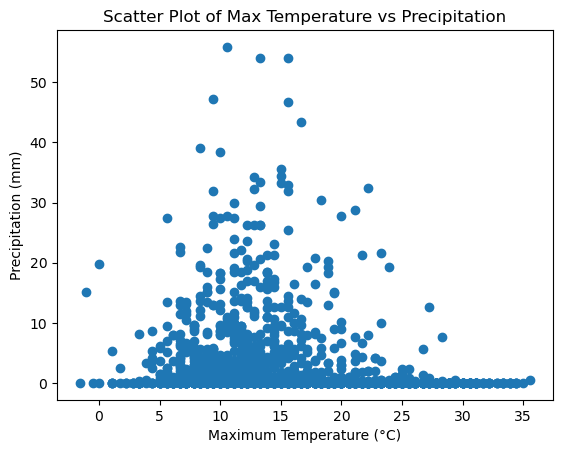

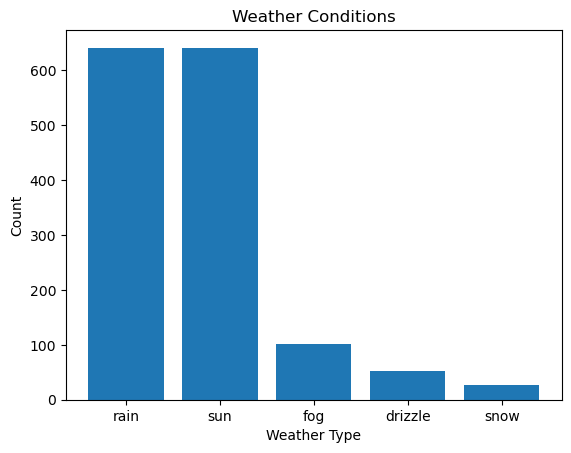


Missing Values by Column:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Dataset after handling missing values:
            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# step 1 - data collection
df = pd.read_csv("seattle-weather.csv")
df5 = df.sample(5)
print(df5)

#------------------------------------------

# step 2 - data visualization
# scatter plot:
plt.figure()
plt.scatter(df['temp_max'], df['precipitation'])
plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.title("Scatter Plot of Max Temperature vs Precipitation")
plt.show()

# bar chart:
plt.figure()
plt.bar(df['weather'].value_counts().index, df['weather'].value_counts().values)
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.title("Weather Conditions")
plt.show()

#------------------------------------------

# step 3 - data preprocessing

# part 1 - handling missing values
# detect missing values
print("\nMissing Values by Column:")
print(df.isnull().sum())

# Fill missing values in 'precipitation' with mean
df['precipitation'] = df['precipitation'].fillna(df['precipitation'].mean())

print("\nDataset after handling missing values:")
print(df)

# part 2 - outlier detection and removal
# Calculate IQR for temp_max
Q1 = df['temp_max'].quantile(0.25)
Q3 = df['temp_max'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nIQR calculation for temp_max: Q1={Q1}, Q3={Q3}, IQR={IQR}")
print(f"Identified Outlier Bounds: Lower={lower_bound}, Upper={upper_bound}")

# Identify outliers
outliers = df[(df['temp_max'] < lower_bound) | (df['temp_max'] > upper_bound)]
print("\nOutliers in temp_max:")
print(outliers)

# Remove outliers
df_no_outliers = df[(df['temp_max'] >= lower_bound) & (df['temp_max'] <= upper_bound)]
print("\nDataset after removing outliers:")
print(df_no_outliers)

# part 3 - data reduction
# a) Sampling: take 60% of rows
df_sample = df_no_outliers.sample(frac=0.6, random_state=1)

# b) Dimension elimination: drop 'wind' column
df_reduced = df_sample.drop(columns=['wind'])

print("\nDataset after data reduction (sampling + dropping 'wind'):")
print(df_reduced)

# part 4 - data scaling and discretization
# a) Min-Max scaling for 'temp_max' and 'temp_min'
scaler = MinMaxScaler()
df_scaled = df_reduced.copy()
df_scaled[['temp_max', 'temp_min']] = scaler.fit_transform(df_scaled[['temp_max', 'temp_min']])

print("\nDataset after Min-Max scaling:")
print(df_scaled)

# b) Discretize 'precipitation' into categories: 'Low', 'Medium', 'High'
bins = [0, 5, 10, np.inf]
labels = ['Low', 'Medium', 'High']
df_scaled['precipitation_cat'] = pd.cut(df_scaled['precipitation'], bins=bins, labels=labels)

print("\nDataset after discretizing precipitation:")
print(df_scaled)

#------------------------------------------

# step 4 - statistical analysis
# part 1 - general overview of data
print("General Overview of Data:\n")
df.info()  # Structure and data types
print("\nStatistical Summary (describe):\n")
print(df.describe())  # Summary statistics for numeric columns

# part 2 - central tendency measures
print("\nCentral Tendency Measures:\n")
numeric_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

for col in numeric_cols:
    print(f"{col}:")
    print(f"  Minimum: {df[col].min()}")
    print(f"  Maximum: {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median()}")
    print(f"  Mode: {df[col].mode().values[0]}")
    print()

# part 3 - dispersion measures
print("Dispersion Measures:\n")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    col_range = df[col].max() - df[col].min()
    variance = df[col].var()
    std_dev = df[col].std()
    
    print(f"{col}:")
    print(f"  Range: {col_range}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Variance: {variance:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}\n")

# part 4 - correlation analysis
print("Correlation Matrix:\n")
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)